# Deep Learning in Medicine
### BMSC-GA 4493, BMIN-GA 3007 
### Spring 2021
### Homework 1

**Learning Objectives**:

1. Basic Math Revision.
2. Introduction to Machine Learning.
3. Logistic Regression Model.
4. Multi-layer Perceptron Model.

**Instruction** 

1. If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex. See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues with writing equations. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

2. Upload and Submit your final jupyter notebook file in <a href='http://newclasses.nyu.edu '>newclasses.nyu.edu</a>

3. Deadline: Thursday Feb 25th 2021 (3pm) **

4. ***HW submission instructions:*** Students should submit a zipped folder named netid_hwx where x is the hw number . The submission should consist of jupyter notebook with all the plots and expected outputs clearly visible in it. The zipped folder should also contain the data files. We should be able to run your ipynb without making directory changes. Not following the protocol might lead to deduction of scores.

---
# Question 1: Math and Machine Learning Revision (20 points)

### Take derivatives of functions from 1.1 to 1.8; calculate loss in 1.9 and 1.10

### 1.1. (2 point)

$f(x) = {e^{e^x} + 2}$

Answer: $f'(x) = e^{e^x+x}$

### 1.2. (2 point)
$f(x) = \sqrt{\sum_{i=1}^{100}(a_i x)}$

($a_1$, $a_2$, $a_3$ and $a_{100}$ are constants)

Answer: $f'(x) = \frac{1}{2}\frac{\sum_{i=1}^{100}a_i}{\sqrt{\sum_{i=1}^{100}a_ix}}$

### 1.3. (2 point)

$f(x) = ln(x+2^x)$

Answer: $f'(x) = \frac{1 + 2^xln(2)}{x+2^x}$

### 1.4. (2 point)

$f(x) = ln(4^x * 7^x)$

Answer: $f'(x) = ln(28)$

### 1.5. (2 point)

$f(x) = \frac{1}{1+e^{-x}}$

Answer: $f'(x) = \frac{e^{-x}}{(1+e^{-x})^2}$

### 1.6. (2 point)
$f(x) = \frac{1}{1+e^{-ax-b}}$

($a$ and $b$ are constants)

Answer: $\frac{ae^{-ax-b}}{(e^{-ax-b}+1)^2}$

### 1.7. (2 point)
$f(x) = \sum_{i=1}^{4}ln(a_i x^2 + b_i)$

($a_i$s and $b_i$s are constants)

Answer: $\sum_{i=1}^{4}(\frac{2a_ix}{a_ix^2+b_i})$


### 1.8. (2 point)
Now consider $X$ is a d-dimensional variable. i.e. $X=(x_1, x_2, ... , x_d)$. Consider $A = (a_i, a_1, ..., a_d)$ to also be a variables. 

Compute partial derivative of $f(X,A)$ with respect to each $x_i$, and each $a_i$:

$f(X, A) = \sum_{i=1}^{d}{ln(a_ix_i)}$

Answer:

$\frac{d}{dX}f(X,A) = \sum_{i=1}^{d}\frac{1}{x_i}$

$\frac{d}{dA}f(X,A) = \sum_{i=1}^{d}\frac{1}{a_i}$

### 1.9. (2 point)
We have predicted values $Z$ from a model and true labels $Y$. Calculate root mean square error (RMSE) using $numpy$ only.

In [83]:
import numpy as np
Z=[0.8585, 0.7474, 0.9393, 0.0121, 0.7564, 0.0005, 0.8293, 0.3114]
Y=[1,0,1,0,1,0,1,1]

MSE = np.square(np.subtract(Y,Z)).mean() 

RMSE = np.sqrt(MSE)
print("RMSE =", RMSE)

RMSE = 0.3783367498010205


### 1.10. (2 point)
We have predicted values $Z$ from a model and true labels $Y$. Calculate average cross entropy using $numpy$ only (using the given epsilon value to avoid undefined log problem).

In [84]:
import numpy as np
Z = np.array([[0.65,0.19,0.12,0.04], [0.21,0.01,0.34,0.44]])
Y = np.array([[0,0,0,1], [0,0,1,0]])

def cross_entropy(predictions, targets, epsilon=1e-12):
    CE = -np.sum(targets*np.log(predictions+epsilon))/len(predictions)
    return CE

CE_np = cross_entropy(Z,Y)
print('Average Cross Entropy =', CE_np)

Average Cross Entropy = 2.1488427431060946


---
# Question 2: Solving Linear Regression via Mean Squared Error (MSE) Optimization Problem (25 points)

Imagine that you have measured two variables X and Y, for a simple task, and you belive that they might be linearly related to each other. Here, our input X has 2 dimensions, and the output has 1 dimension. We will use super-script to indicate which sample it is, and sub-scipt to indicate which dimension it is. 
The measurements are as follows:

###### (Training data D = {($X^1$, $Y^1$), ($X^2$, $Y^2$), ($X^3$, $Y^3$)})

Sample 1: $X^1 = (x_1^1, x_2^1) = (1, 2)$,   $Y^1$ = 3

Sample 2: $X^2 = (x_1^2, x_2^2) = (3, 4)$,   $Y^2$ = 5

Sample 3: $X^3 = (x_1^3, x_2^3) = (0, -1)$,   $Y^3$ = 6





If we assume that the relationship between X and Y is linear, we can write this relationship as:

$Y = f_{W,B}(X) = WX + B = w_1*x_1 + w_2*x_2 + B$

where $W = (w_1, w_2)$ and $B$ are the parameters of the model.	
We are interested in finding best values for W and B.	
We define 'best' in terms of a loss function between $f_{W,b}(X_i)$ and $Y_i$ for each ($X_i$ and $Y_i$) in the training data. 	
Since $Y_i$s are real numbers, let's consider Mean Squared Error loss. 

Remember that Mean Squared Error for this function, over training data, and W and B is:

$MSELoss(D={(X_1, Y_1), (X_2, Y_2), (X_3, Y_3)}), W, B) = \frac{1}{3}\sum_{i=1}^{3} (f_{W,B}(X_i) - Y_i)^2 $

### 2.1. (3 points)
Compute the partial derivative of $MESLoss(D, W, B)$, With respect to W and B.	
Remember that $X_1$, $X_2$, $X_3$, $Y_1$, $Y_2$, and $Y_3$ are constants, and already given to us as training data above.

$\frac{d}{d w_1} MSELoss(D, W, B) = \frac{4}{3}(5w_1 + 7w_2 + 2B - 9)$

$\frac{d}{d w_2} MSELoss(D, W, B) = \frac{2}{3}(14w_1 + 21w_2 + 5B - 20)$

$\frac{d}{d B} MSELoss(D, W, B) = \frac{2}{3}(4w_1 + 5w_2 + 3B - 14)$

### 2.2. (3 points)
Use matplotlib library and plot $\frac{d}{d w1} MSELoss(D, W, B)$ for $w_1 = np.arange(0, 5, 0.5)$, when $w_2$ equals -2, and B equals to 4.

Text(0, 0.5, '$\\frac{d}{d w1} MSELoss(D, W, B)$')

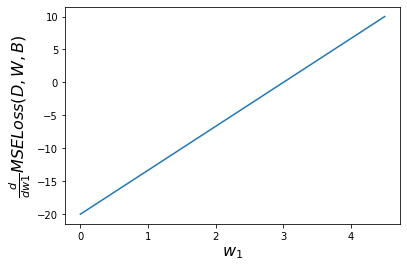

In [85]:
import matplotlib.pyplot as plt
import numpy as np
w1 = np.arange(0, 5, 0.5)
# plot dMSELoss/dw1 here:
def ddw1_MSELoss(w1,w2,B):
    mse = []
    for i in w1:
        mse.append((4/3)*(5*i+7*w2+2*B-9))
    return mse

plt.plot(w1, ddw1_MSELoss(w1,-2,4))
plt.xlabel('$w_1$', fontsize=16)
plt.ylabel('$\\frac{d}{d w1} MSELoss(D, W, B)$', fontsize=16)

### 2.3. (3 points)
What values of $w_1$, $w_2$ and $B$, make all partial derivatives zero?

Answer: 

$w_1$ = 3

$w_2$ = -2

$B$ = 4

### 2.4. (6 points)
If you start from an initial point $w_1^0 = 0.1$ , $w_2^0 = 0.1$ and $B^0 = 0.1$, and iteratively update your $w_1$, $w_2$, and B via gradient descent as follows:
    
$ w_1^{t+1} = w_1^t - 0.01 * \frac{d}{d w_1} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
$ w_2^{t+1} = w_2^t - 0.01 * \frac{d}{d w_2} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
$ B^{t+1} = B^t - 0.01 * \frac{d}{d B} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
(Note: This is gradient descent with a 0.01 learning rate.)

What are the values of Ws and B over iterations 0 to 1000? (Don't compute by hand! Write a code!)	
Write a python script that computes these values for 1000 iterations, i.e. lists of $\{w_1^0, w^1_1,.., w_1^{1000}\}$, $\{w_2^0, w_2^1,.., w_2^{1000}\}$, and $\{B^0, B^1,.., B^{1000}\}$.	
Plot the lists of $w_1$s, $w_2$s and Bs over 1000 iterations.




In [86]:
def params(learn):
    w1_t = 0.1
    w2_t = 0.1
    B_t = 0.1
    w1 = [w1_t]
    w2 = [w2_t]
    B = [B_t]
    for i in range(1,1001):
        w1_n = w1_t - learn*((4/3)*(5*w1_t+7*w2_t+2*B_t-9))
        w2_n = w2_t - learn*((2/3)*(14*w1_t+21*w2_t+5*B_t-20))
        B_n = B_t - learn*((2/3)*(4*w1_t+5*w2_t+3*B_t-14))
        w1.append(w1_n)
        w2.append(w2_n)
        B.append(B_n)
        w1_t = w1_n
        w2_t = w2_n
        B_t = B_n
    return w1, w2, B

w1, w2, B = params(0.01)

print('w1:', w1)
print('w2:', w2)
print('B:', B)

w1: [0.1, 0.20133333333333334, 0.28368, 0.3510601481481481, 0.40663790617283946, 0.45290371143637853, 0.4918178030781629, 0.5249231509476843, 0.5534343307543188, 0.5783074688800963, 0.6002952890095665, 0.6199904338835998, 0.6378595595708259, 0.654270167706513, 0.6695117225086411, 0.68381226991104, 0.6973515168605449, 0.7102711247614875, 0.722682810452692, 0.734674721711332, 0.7463164548083919, 0.7576630033578514, 0.7687578660932529, 0.7796354927194373, 0.7903232088288243, 0.8008427308409379, 0.8112113582897182, 0.821442912183073, 0.8315484735208435, 0.8415369645370282, 0.8514156061656047, 0.861190278093946, 0.8708658021523111, 0.8804461653684756, 0.8899346955384859, 0.8993341994272703, 0.908647071558624, 0.9178753798587121, 0.9270209330829796, 0.9360853339062967, 0.9450700207297682, 0.9539763006072615, 0.9628053751828588, 0.9715583611276215, 0.9802363062470253, 0.9888402021809348, 0.9973709944216296, 1.0058295902208616, 1.014216864835313, 1.0225336664641047, 1.0307808201566895, 1.03895

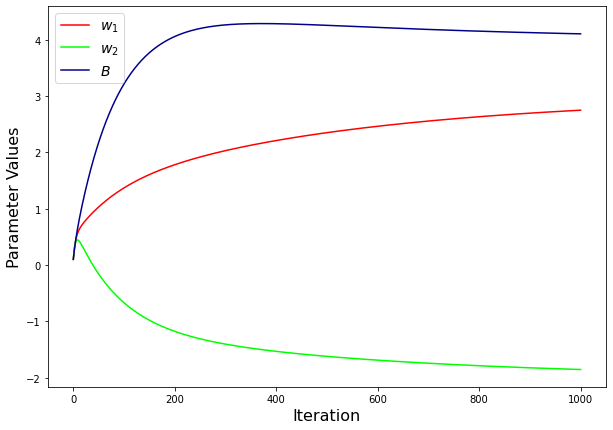

In [87]:
plt.figure(figsize=(10, 7))
plt.plot(range(1001), w1, label='$w_1$', color='red')
plt.plot(range(1001), w2, label='$w_2$', color='lime')
plt.plot(range(1001), B, label='$B$', color='darkblue')
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Parameter Values', fontsize=16)
plt.legend(fontsize=14)

### 2.5. (10 points)
Now that you learned the math and made the code yourself, we will use pytorch and automatic differentiation, to find optimal W and B!	
Again, consider data to be D = {($X_1$, $Y_1$), ($X_2$, $Y_2$), ($X_3$, $Y_3$)}) = {((1,2), 3), ((3,4), 5), ((0,-1), 6)}.

Some of your steps are here. Fill in the rest and show a plot of the loss function, $w_1$, $w_2$ and B over these 1000 epochs.

In [88]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim

D = [((1,2), 3), ((3,4), 5), ((0,-1), 6)]
X = [d[0] for d in D]
Y = [d[1] for d in D]
print('data X is:', X)
print('data Y is:', Y)

model = torch.nn.Linear(2, 1, bias=True)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

losslist = []
w1list = []
w2list = []
blist = []

# for epoch in range(1000):
    # Shuffle your training data samples
    # Loop over your training data in the new order:
        #dont forget to: optimizer.zero_grad()
        #prepare your x_input and y_target if needed
        #send the data through your model: i.e. pred_i = model(x_input)
        #send the prediction through the loss function too: i.e. lossout= loss(pred_i, y_target)
        #call backward to back-propagate: i.e. lossout.backward()
        #call optimizer.step() to update the model parameters based on the computed gradients
        #keep the w1s, w2s, and bs, and loss value some list so you can plot them later

for i in range(1000):
    np.random.shuffle(D)
    X = [d[0] for d in D]
    Y = [d[1] for d in D]
    X_torch = torch.Tensor(X)
    Y_torch = torch.Tensor(Y)
    optimizer.zero_grad()
    Y_pred = model(X_torch)
    lossout = loss(Y_pred, Y_torch)
    lossout.backward()
    optimizer.step()
    
    losslist.append(lossout.tolist())

    params = []
    for i in iter(model.parameters()):
        params.append(i.data.tolist())
    w1list.append(params[0][0][0])
    w2list.append(params[0][0][1])
    blist.append(params[1][0])

print('w1list: ', w1list)
print('w2list: ', w2list)
print('blist: ', blist)
print('losslist: ', losslist)

data X is: [(1, 2), (3, 4), (0, -1)]
data Y is: [3, 5, 6]


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


w1list:  [-0.46851280331611633, -0.3153916001319885, -0.1934380829334259, -0.09603451937437057, -0.017972487956285477, 0.044847287237644196, 0.09565120190382004, 0.1369786560535431, 0.1708284169435501, 0.19877374172210693, 0.22205302119255066, 0.2416411191225052, 0.25830546021461487, 0.27265027165412903, 0.28515127301216125, 0.29618310928344727, 0.30604082345962524, 0.31495681405067444, 0.3231142461299896, 0.3306574523448944, 0.337700217962265, 0.34433233737945557, 0.3506246507167816, 0.35663312673568726, 0.3624020218849182, 0.36796635389328003, 0.37335386872291565, 0.3785865902900696, 0.3836820721626282, 0.38865429162979126, 0.393514484167099, 0.3982716202735901, 0.40293294191360474, 0.4075043499469757, 0.4119906723499298, 0.416395902633667, 0.4207232892513275, 0.42497560381889343, 0.42915523052215576, 0.4332641363143921, 0.4373041093349457, 0.4412766695022583, 0.4451831877231598, 0.44902491569519043, 0.45280298590660095, 0.4565184414386749, 0.46017226576805115, 0.46376538276672363, 0

(-2.5356314137578013, 11.112700939178467)

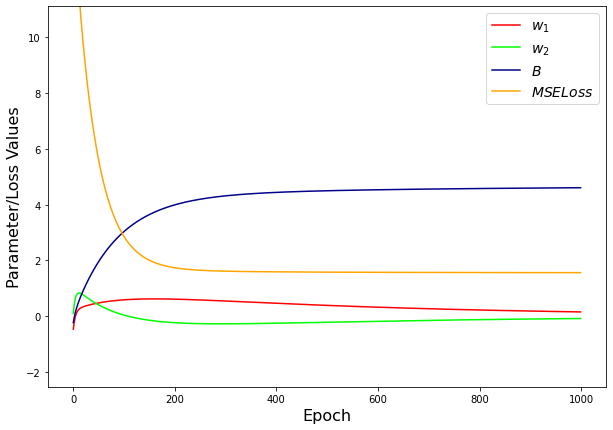

In [89]:
#plot the losslist, w1s, w2s, and bs.
plt.figure(figsize=(10, 7))
plt.plot(range(1000), w1list, label='$w_1$', color='red')
plt.plot(range(1000), w2list, label='$w_2$', color='lime')
plt.plot(range(1000), blist, label='$B$', color='darkblue')
plt.plot(range(1000), losslist, label='$MSE Loss$', color='orange')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Parameter/Loss Values', fontsize=16)
plt.legend(fontsize=14)
plt.ylim(top=losslist[400]*7)

# Question 3: Learning Curves, Overfitting, and Machine Learning (55 points)

Now we know how to optimize, let's get some real machine learning done!	

Instead of the small dataset we had in questions 2, now let's use the the CBIS-DDSM (Curated Breast Imaging Subset of DDSM) dataset from <a href="https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM#385f2cd4e86f4142b1d32bdb5803bd96"> here</a>


In this homework, we will *only* focus on the following items in the dataset:	
Mass-Training-Description (csv)	
Mass-Test-Description (csv)	
(Don't download the images on your laptop! That file is too big and we deal with it on the cluster later!)

This dataset contains several features related to Mammography and detection of breast cancer. 

The Mass-Training-Description and Mass-Test-Description include these columns:

patient_id	
breast_density	
left or right breast	
image view		
abnormality id		
abnormality type	
mass shape	
mass margins	
assessment	
pathology

There is more data in this dataset, including images, but for this homework we will not focus on them.

We are interested in 3.1-3.6 Using variables:	

breast_density		
image view		
abnormality id			
mass shape	
mass margins


How well can we predict the **pathology type**?

We can answer that by training a model on the Mass-Training-Description, and evaluating it on Mass-Test-Description. 
See questions 3.1 and 3.2




### 3.1. (5 points)
Write a script to prepare input [breast_density, image view, abnormality id, mass shape, mass margins] and output [pathology type]. 

The output of your script should be a matrix X and a vector Y, where each row of X are input variables of a patient, and each row of Y is the pathology type class, for that patient. Create dummy variables for [image view, abnormality id, mass shape, and mass margins]. 

How many columns do you have now?

Use *matplotlib.imshow* to visualize the X.	
(And if there are multiple equivalent rows per patient, keep only one of them - any, up to you)


Columns in training data:  44


Text(0, 0.5, 'Patient')

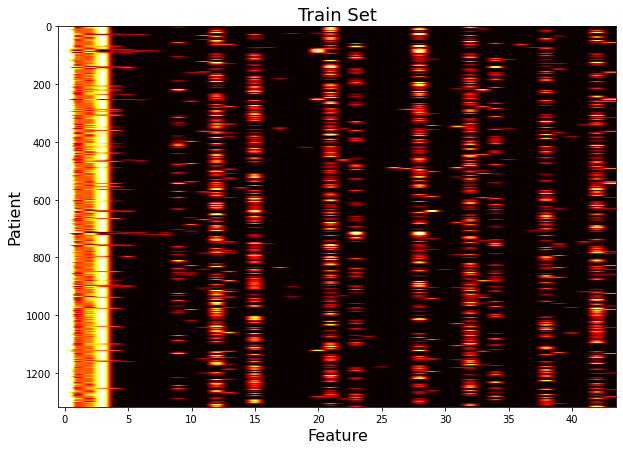

In [90]:
import pandas as pd

import sklearn.metrics as metrics
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Import data
msd_train = pd.read_csv('https://raw.githubusercontent.com/bmurphy1993/BMSC-GA-4493-Spring2021_BM/main/HW1/mass_case_description_train_set.csv')
varlist = ['patient_id', 'breast_density', 'image view', 'abnormality id', 'mass shape', 'mass margins', 'pathology']
dummies = ['image view', 'abnormality id', 'mass shape', 'mass margins']

def msd_clean(data, varlist, dummies):
    # X and Y
    x_cat = data[varlist]
    x_cat.drop_duplicates().reset_index() # drop duplicate patients

    y_labs = x_cat[['pathology']].astype('category')
    y_dict = dict(zip(y_labs.pathology.cat.codes, y_labs.pathology))
    y_labs = y_labs.values.tolist()
    y_labs = [i[0] for i in y_labs]
    rev_y = {v:k for k,v in y_dict.items()}
    y = [rev_y.get(item,item)  for item in y_labs]

    x_cat = x_cat.drop(['patient_id', 'pathology'], axis=1)

    # Dummies
    x = pd.DataFrame(x_cat['breast_density']).merge(pd.DataFrame(pd.get_dummies(x_cat[dummies].astype(str))), 
                                                  left_index=True, 
                                                  right_index=True)

    x_cols = x.columns.tolist()

    return x, y, x_cols, y_labs, y_dict

x_train, y_train, x_train_cols, y_train_labs, y_train_dict = msd_clean(msd_train, varlist, dummies)

# Columns
print('Columns in training data: ', x_train.shape[1])

# Visualize
plt.figure(figsize=(10, 7))
plt.imshow(x_train, aspect='auto', cmap=plt.get_cmap('hot'), vmin=0, vmax=1)
plt.title('Train Set', fontsize=18)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Patient', fontsize=16)

### 3.2. (2 points)
Repeat Question 3.1 for the test set - remember to make sure you have same number of columns for test and train set!
Use matplotlib.imshow(xtest, aspect='auto') to show the x dataset

Columns in test data:  37


Text(0, 0.5, 'Patient')

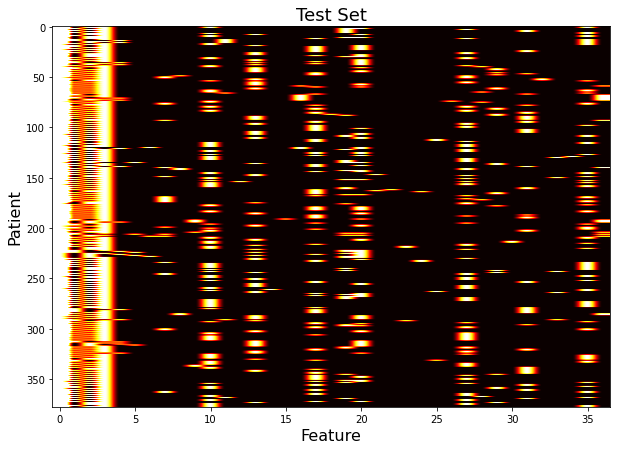

In [91]:
# Import Data
msd_test = pd.read_csv('https://raw.githubusercontent.com/bmurphy1993/BMSC-GA-4493-Spring2021_BM/main/HW1/mass_case_description_test_set.csv')

x_test, y_test, x_test_cols, y_test_labs, y_test_dict = msd_clean(msd_test, varlist, dummies)

# Columns
print('Columns in test data: ', x_test.shape[1])

# Visualize
plt.figure(figsize=(10, 7))
plt.imshow(x_test, aspect='auto', cmap=plt.get_cmap('hot'), vmin=0, vmax=1)
plt.title('Test Set', fontsize=18)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Patient', fontsize=16)

Columns in train data:  50
Columns in test data:  50
Test not train:  [] 
Train not test:  []
Breast Density Same: True


Text(0, 0.5, 'Patient')

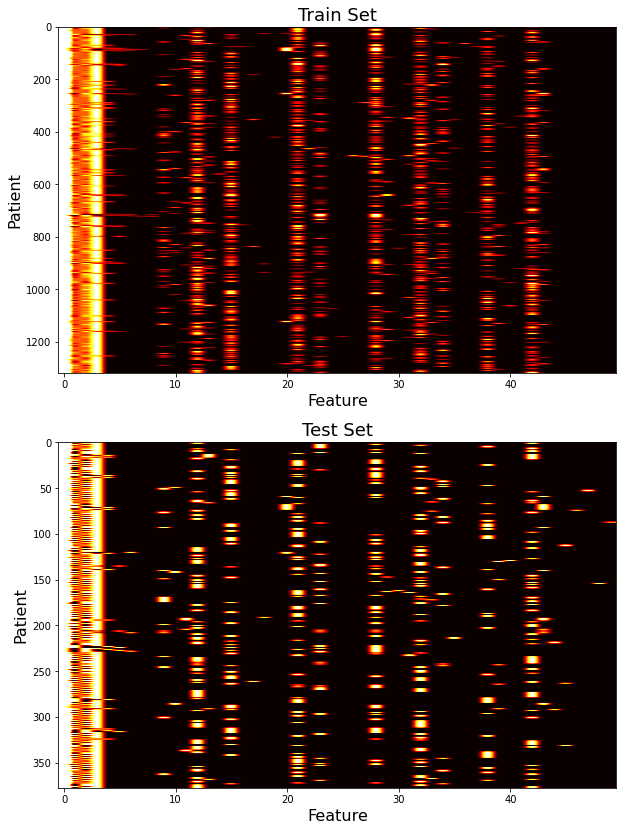

In [92]:
# Standardize columns in train and test sets
train_not_test = np.setdiff1d(x_train_cols,x_test_cols)
test_not_train = np.setdiff1d(x_test_cols,x_train_cols)

for col in train_not_test:
    x_test[col] = 0

for col in test_not_train:
    x_train[col] = 0

print('Columns in train data: ', x_test.shape[1])
print('Columns in test data: ', x_test.shape[1])

# Make sure it worked
x_train_cols = x_train.columns.tolist()
x_test_cols = x_test.columns.tolist()

train_not_test = np.setdiff1d(x_train_cols,x_test_cols)
test_not_train = np.setdiff1d(x_test_cols,x_train_cols)

print('Test not train: ', test_not_train, '\nTrain not test: ', train_not_test)

# Set order the same
bd_test = list(x_test['breast_density'])

x_test = x_test[x_train_cols]
x_test_cols = x_test.columns.tolist()

# Sanity check that test data is still the same
if bd_test == list(x_test['breast_density']): 
    print('Breast Density Same: True') 
else : 
    print('Breast Density Same: False')

# Visualize again
f, axs = plt.subplots(2, figsize=(10, 14))
axs[0].imshow(x_train, aspect='auto', cmap=plt.get_cmap('hot'), vmin=0, vmax=1)
axs[0].set_title('Train Set', fontsize=18)
axs[0].set_xlabel('Feature', fontsize=16)
axs[0].set_ylabel('Patient', fontsize=16)
axs[1].imshow(x_test, aspect='auto', cmap=plt.get_cmap('hot'), vmin=0, vmax=1)
axs[1].set_title('Test Set', fontsize=18)
axs[1].set_xlabel('Feature', fontsize=16)
axs[1].set_ylabel('Patient', fontsize=16)

### 3.3. Multi-layered-perceptron (15 points)

Design a multi layer perceptron (MLP) with a single hidden layer which first maps the input to a vector of 100 hidden nodes, then feeds this vector to a fully connected layer to get the probability of 3 classes: BENIGN_WITHOUT_CALLBACK, BENIGN, MALIGNANT

You can choose optimizer and loss function of your interest.

Plot the ***average loss on all the train samples*** per epoch. (Stop the training after 1000 epochs). 
Also plot the **training** Area Under ROC curve (AUC) score of class "MALIGNANT" vs. Non-MALIGNANT class per epoch. 


In [93]:
# Plot loss helper function
def plot_loss(result, title):
    best_model, train_loss, y_pred, train_auc_hist = result
    x = np.arange(len(train_loss))
    
    plt.figure(figsize=(10, 7))
    plt.plot(x, train_loss, label="Loss")
    
    plt.title(title, fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)

    plt.legend(fontsize=14)
    plt.show()

# Plot auc helper function
def plot_auc(result, title):
    best_model, train_loss, y_pred, train_auc_hist = result
    x = np.arange(len(train_auc_hist))
    
    plt.figure(figsize=(10, 7))
    plt.plot(x, train_auc_hist, label="Train AUC")
    
    plt.title(title, fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('AUC', fontsize=16)

    plt.legend(fontsize=14)
    plt.show()

In [94]:
# Define train function
def train(X_train, Y_train, model, alpha=.005, batch_size=100, num_epoch=1000):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=alpha)

    num_samples, num_features = x_train.shape
    num_batches = int(num_samples / batch_size)
    order = np.arange(num_samples)

    best_model = None
    train_loss_hist = []
    train_auc_hist = [] 

    loss_diff = 100
    i = 0

    while i <= num_epoch:
        np.random.shuffle(order)
        minibatches = np.array_split(order, num_batches)
        i +=1
        train_loss_batches = []
        
        for j in range(num_batches):
            batch = minibatches[j]

            # Train mode, reset gradient
            model.train()
            model.zero_grad()
            
            # Make batch prediction
            y_train_pred = model(X_train[batch]).squeeze()

            # compute training loss
            train_loss = loss_fn(y_train_pred, Y_train[batch])
            train_loss_batches.append(train_loss.item()*len(batch))
            
            # gradient
            train_loss.backward()
            # Parameter update
            optimizer.step()
        
        # Calculate average loss per epoch
        train_loss_hist.append(sum(train_loss_batches) / len(X_train))

        # AUC per epoch
        try:
            y_train_pred = model(X_train).squeeze() 
            probs_train = np.array(y_train_pred.tolist())
            probs_train = probs_train[:, 1] 
            train_labs = Y_train.tolist() 
            train_auc = roc_auc_score(train_labs, probs_train) 
            train_auc_hist.append(train_auc) 
        except:
            pass

    # Get final training predictions
    y_train_pred = model(X_train).squeeze()
     
    return (best_model, train_loss_hist, y_train_pred, train_auc_hist)

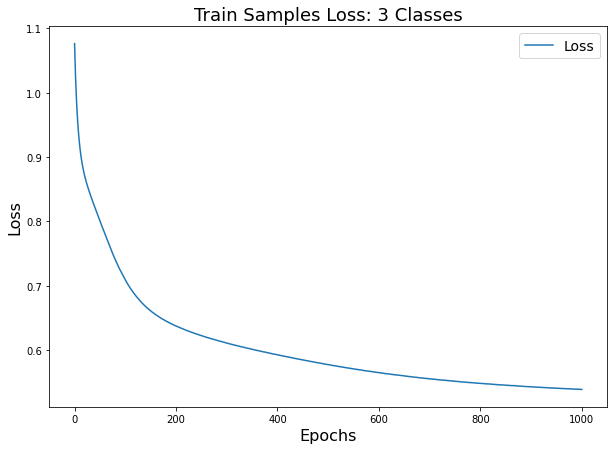

In [95]:
# MLP 
class MLP(nn.Module):
    def __init__(self, in_features, hidden_size=100, out_features=3):
        super(MLP, self).__init__()
        self.net = nn.Sequential(nn.Linear(in_features, hidden_size),
                                 nn.ReLU(),
                                 nn.Linear(hidden_size, out_features))

    def forward(self, x):
        out = self.net(x)
        return out

# Plot training loss
model = MLP(50)
result = train(torch.from_numpy(x_train.values).float(), torch.tensor(y_train), model)
plot_loss(result, 'Train Samples Loss: 3 Classes')

Retrain model for binary prediction of Malignant vs. Non-malignant

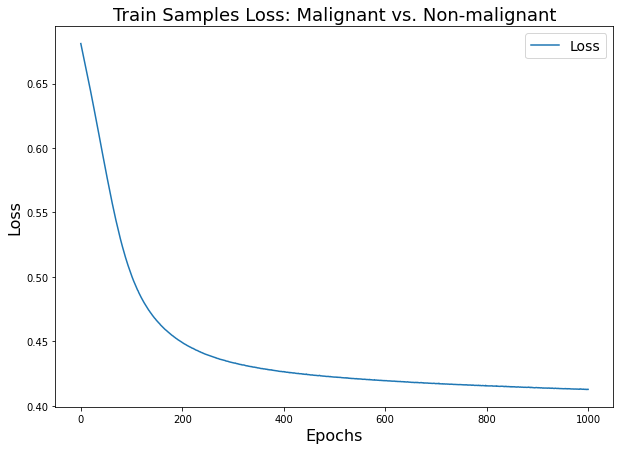

In [96]:
# redefine labels
y_train_binary = [0 if x == 1 else x for x in y_train]
y_train_binary = [1 if x == 2 else x for x in y_train_binary]

# retrain model
model = MLP(50, out_features=2)
result = train(torch.from_numpy(x_train.values).float(), torch.tensor(y_train_binary), model)
plot_loss(result, 'Train Samples Loss: Malignant vs. Non-malignant')

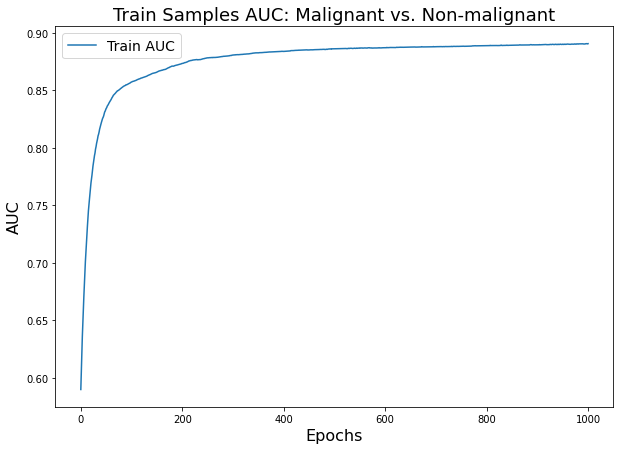

In [97]:
# Plot AUC per epoch
plot_auc(result, 'Train Samples AUC: Malignant vs. Non-malignant')

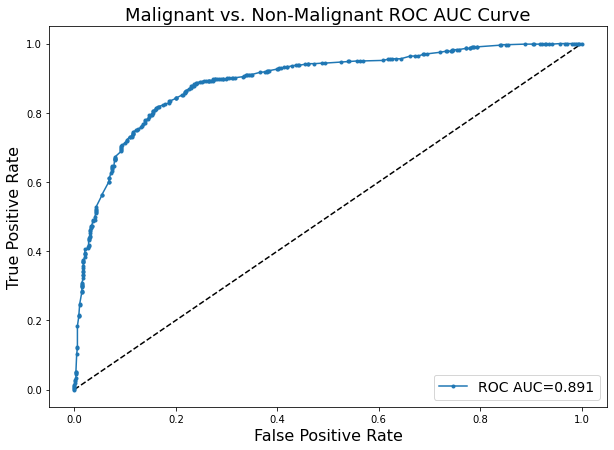

In [98]:
# AUC for malignant vs. non-malignant

# calculate the fpr and tpr for all thresholds of the classification
probs = np.array(result[2].tolist())

# no skill probs
ns_probs = [0 for _ in range(len(y_train_binary))]
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
train_auc = roc_auc_score(y_train_binary, probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train_binary, ns_probs)
train_fpr, train_tpr, _ = roc_curve(y_train_binary, probs)
# plot the roc curve for the model
plt.figure(figsize=(10, 7))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='black')
plt.plot(train_fpr, train_tpr, marker='.', label='ROC AUC=%.3f' % (train_auc), color='#1f77b4')
plt.title('Malignant vs. Non-Malignant ROC AUC Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='lower right', fontsize=14)

plt.show()

### 3.4. (10 points)
Now let's evaluate the same loss function over your ***test set***. 
Plot the ***average loss on all the test samples*** and the ***average loss on all the train samples*** per epoch in the same plot. (Stop the training after 1000 epochs)

Also plot the **test set** Area Under ROC curve (AUC) score (per epoch) for class "MALIGNANT" vs. Non-MALIGNANT class. Plot both test set AUC and training set AUC (per epoch) in the same figure/plot. 


In [99]:
# Update plot helper functions
# Loss
def plot_loss(result, title):
    best_model, train_loss, test_loss, y_train_pred, y_test_pred, train_auc_hist, test_auc_hist = result
    x = np.arange(len(train_loss))
    
    plt.figure(figsize=(10, 7))
    plt.plot(x, train_loss, label='Train Loss')
    plt.plot(x, test_loss, label='Test Loss')
    
    plt.title(title, fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)

    plt.legend(fontsize=14)
    plt.show()

# AUC
def plot_auc(result, title):
    best_model, train_loss, test_loss, y_train_pred, y_test_pred, train_auc_hist, test_auc_hist = result
    x = np.arange(len(train_auc_hist))
    
    plt.figure(figsize=(10, 7))
    plt.plot(x, train_auc_hist, label="Train AUC")
    plt.plot(x, test_auc_hist, label="Test AUC")
    
    plt.title(title, fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('AUC', fontsize=16)

    plt.legend(fontsize=14)
    plt.show()

In [100]:
# Update train function
def train(data, model, alpha=.005, batch_size=100, num_epoch=1000):
    X_train, Y_train, X_test, Y_test = data
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=alpha)

    num_samples, num_features = x_train.shape
    num_batches = int(num_samples / batch_size)
    order = np.arange(num_samples)

    best_test_loss = float('Inf')
    best_model = None
    train_loss_hist = []
    train_auc_hist = []
    test_auc_hist = []

    test_loss_hist = []
    loss_diff = 100
    i = 0

    while i <= num_epoch:
        np.random.shuffle(order)
        minibatches = np.array_split(order, num_batches)
        i +=1
        train_loss_batches = []
        for j in range(num_batches):
            batch = minibatches[j]

            # Train mode, reset gradient
            model.train()
            model.zero_grad()
            
            # Make batch prediction
            y_train_pred = model(X_train[batch]).squeeze()

            # compute training loss
            train_loss = loss_fn(y_train_pred, Y_train[batch])
            train_loss_batches.append(train_loss.item()*len(batch))
            
            # gradient
            train_loss.backward()
            # Parameter update
            optimizer.step()
        
        # Calculate average loss per epoch
        train_loss_hist.append(sum(train_loss_batches) / len(X_train))

        # Evaluate on test set
        with torch.no_grad():
            model.eval()
            test_loss_hist.append(loss_fn(model(X_test).squeeze(), Y_test))
            # Keep track of best model (minimum loss)
            if test_loss_hist[-1] < best_test_loss:
                best_model = model.state_dict()
            if len(test_loss_hist) >= 2:
                loss_diff = abs(test_loss_hist[-2]-test_loss_hist[-1])
      
        # AUC per epoch
        try:
            y_train_pred = model(X_train).squeeze() 
            probs_train = np.array(y_train_pred.tolist())
            probs_train = probs_train[:, 1] 
            train_labs = Y_train.tolist() 
            train_auc = roc_auc_score(train_labs, probs_train)
            train_auc_hist.append(train_auc) 

            y_test_pred = model(X_test).squeeze() 
            probs_test = np.array(y_test_pred.tolist())
            probs_test = probs_test[:, 1] 
            test_labs = Y_test.tolist() 
            test_auc = roc_auc_score(test_labs, probs_test)
            test_auc_hist.append(test_auc) 
        except:
            pass
        
    # Get final predictions
    model.load_state_dict(best_model)
    y_train_pred = model(X_train).squeeze()
    y_test_pred = model(X_test).squeeze()
    

    return (best_model, train_loss_hist, test_loss_hist, y_train_pred, y_test_pred, train_auc_hist, test_auc_hist)

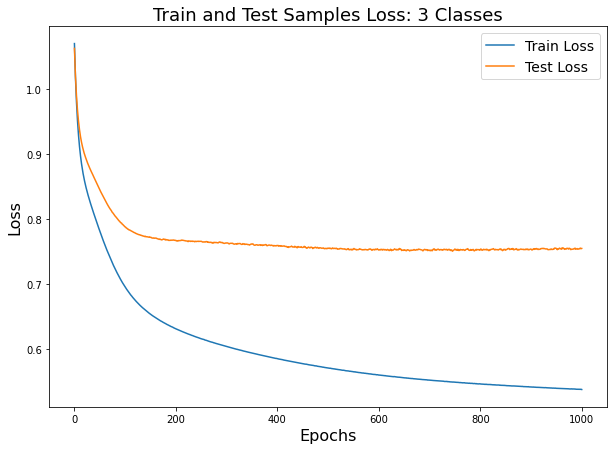

In [101]:
# Plot test loss
all_data = [torch.from_numpy(x_train.values).float(), torch.tensor(y_train), torch.from_numpy(x_test.values).float(), torch.tensor(y_test)]

model = MLP(50)
result = train(all_data, model)
plot_loss(result, 'Train and Test Samples Loss: 3 Classes')

Retrain model for binary prediction of Malignant vs. Non-malignant

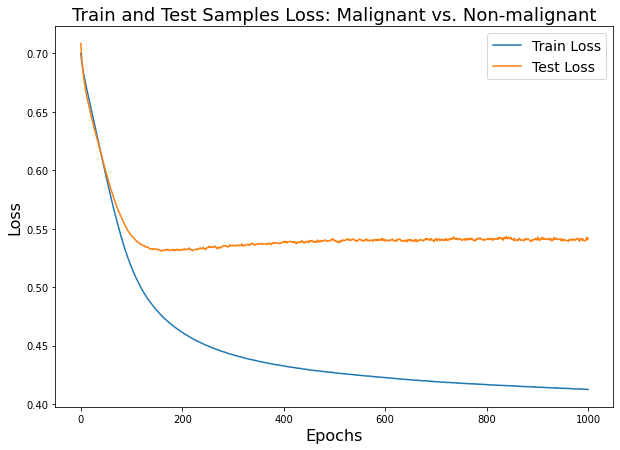

In [102]:
# redefine test labels
y_test_binary = [0 if x == 1 else x for x in y_test]
y_test_binary = [1 if x == 2 else x for x in y_test_binary]

binary_data = [torch.from_numpy(x_train.values).float(), torch.tensor(y_train_binary), torch.from_numpy(x_test.values).float(), torch.tensor(y_test_binary)]

# retrain model
model = MLP(50, out_features=2)
result = train(binary_data, model)
plot_loss(result, 'Train and Test Samples Loss: Malignant vs. Non-malignant')

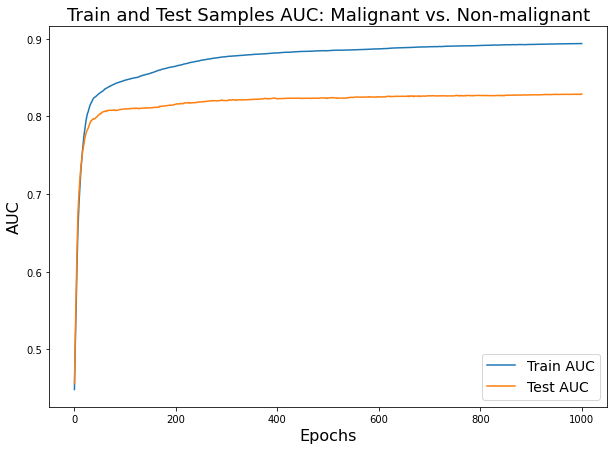

In [103]:
plot_auc(result, 'Train and Test Samples AUC: Malignant vs. Non-malignant')

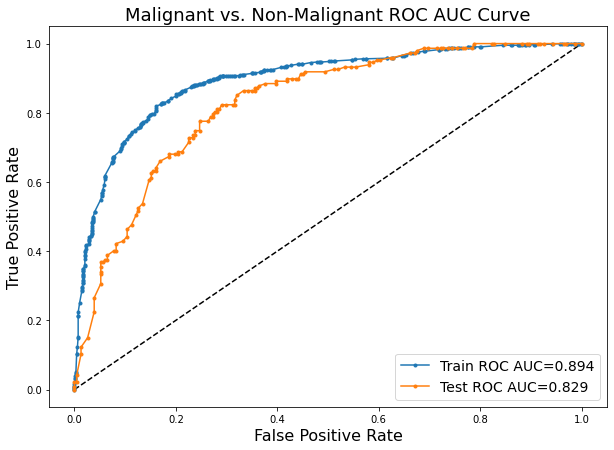

In [104]:
# AUC for malignant vs. non-malignant

def ROC_AUC(result):
    # calculate the fpr and tpr for all thresholds of the classification
    probs_train = np.array(result[3].tolist())
    probs_test = np.array(result[4].tolist())

    # no skill probs
    ns_probs = [0 for _ in range(len(y_train_binary))]
    # keep probabilities for the positive outcome only
    probs_train = probs_train[:, 1]
    probs_test = probs_test[:, 1]
    # calculate scores
    train_auc = roc_auc_score(y_train_binary, probs_train)
    test_auc = roc_auc_score(y_test_binary, probs_test)

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_train_binary, ns_probs)
    train_fpr, train_tpr, _ = roc_curve(y_train_binary, probs_train)
    test_fpr, test_tpr, _ = roc_curve(y_test_binary, probs_test)
    # plot the roc curve for the model
    plt.figure(figsize=(10, 7))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', color='black')
    plt.plot(train_fpr, train_tpr, marker='.', label='Train ROC AUC=%.3f' % (train_auc), color='#1f77b4')
    plt.plot(test_fpr, test_tpr, marker='.', label='Test ROC AUC=%.3f' % (test_auc), color='#ff7f0e')
    plt.title('Malignant vs. Non-Malignant ROC AUC Curve', fontsize=18)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc='lower right', fontsize=14)

    plt.show()

ROC_AUC(result)

### 3.5. (2 points)
How many parameters you need to fit for your design?

In [105]:
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of parameters in model =', count_params(model))
# (50*100 + 1) + (100*3 + 1) = 5302

Number of parameters in model = 5302


### 3.6. (3 points)
Design a multi-class **logistic regression** model which takes the input and outputs the probability of 3 classes. How many parameters you need to fit for your design?

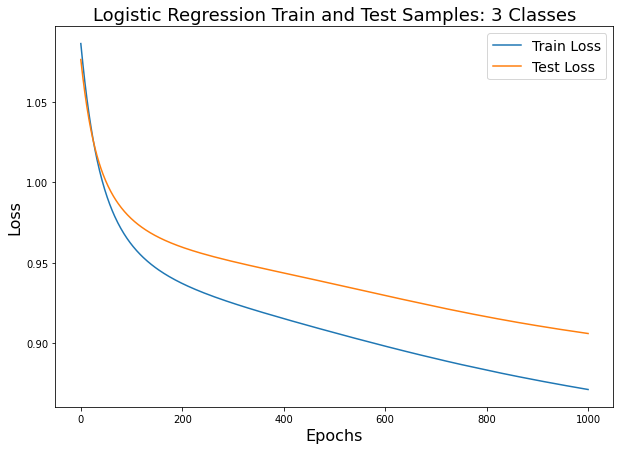

Number of parameters in model = 153


In [106]:
class LogReg(nn.Module):
    def __init__(self, in_features, out_features=3):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

model = LogReg(50)
result = train(all_data, model)
plot_loss(result, 'Logistic Regression Train and Test Samples: 3 Classes')

print('Number of parameters in model =', count_params(model))
# (50 + 1)*3 = 153

### 3.7. (13 points)
Now, let's add 2 more variables to the input: [left or right breast, abnormality type], and create their corresponding dummy variables. 

Build a new MLP model using similar architecture as before, with same number of hidden nodes. Train and evaluate that model for 1000 epochs, and plot the average traing set and average test set loss functions and AUCs given the new expanded feature sets.

In [107]:
# Add vars to data
varlist = ['patient_id', 'breast_density', 'image view', 'abnormality id', 'mass shape', 'mass margins', 'left or right breast', 'abnormality type', 'pathology']
dummies = ['image view', 'abnormality id', 'mass shape', 'mass margins', 'left or right breast', 'abnormality type']
x_train, y_train, x_train_cols, y_train_labs, y_train_dict = msd_clean(msd_train, varlist, dummies)
x_test, y_test, x_test_cols, y_test_labs, y_test_dict = msd_clean(msd_test, varlist, dummies)

# Standardize columns in train and test sets
train_not_test = np.setdiff1d(x_train_cols,x_test_cols)
test_not_train = np.setdiff1d(x_test_cols,x_train_cols)

for col in train_not_test:
    x_test[col] = 0

for col in test_not_train:
    x_train[col] = 0

# Set order the same
x_train_cols = x_train.columns.tolist()

x_test = x_test[x_train_cols]
x_test_cols = x_test.columns.tolist()

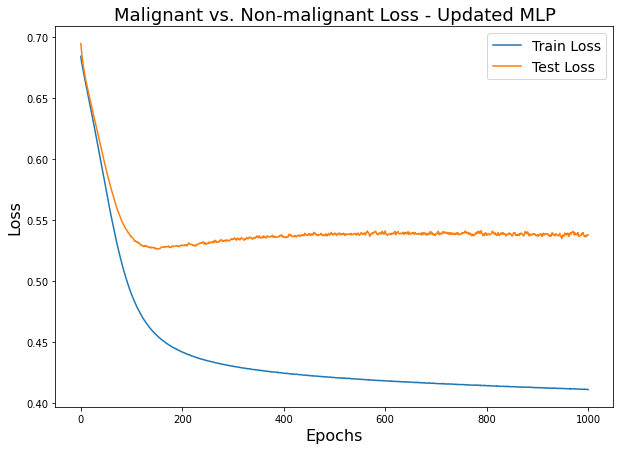

In [108]:
# Binary labels
y_train_binary = [0 if x == 1 else x for x in y_train]
y_train_binary = [1 if x == 2 else x for x in y_train_binary]

y_test_binary = [0 if x == 1 else x for x in y_test]
y_test_binary = [1 if x == 2 else x for x in y_test_binary]

binary_data = [torch.from_numpy(x_train.values).float(), torch.tensor(y_train_binary), torch.from_numpy(x_test.values).float(), torch.tensor(y_test_binary)]

# Retrain model
model = MLP(53, out_features=2)
result = train(binary_data, model)
plot_loss(result, 'Malignant vs. Non-malignant Loss - Updated MLP')

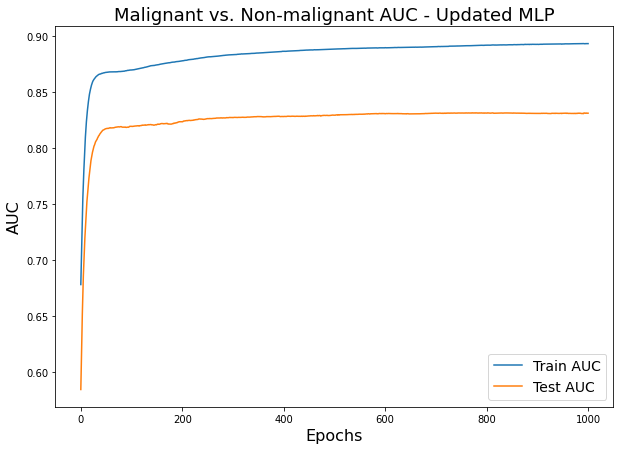

In [109]:
plot_auc(result, 'Malignant vs. Non-malignant AUC - Updated MLP')

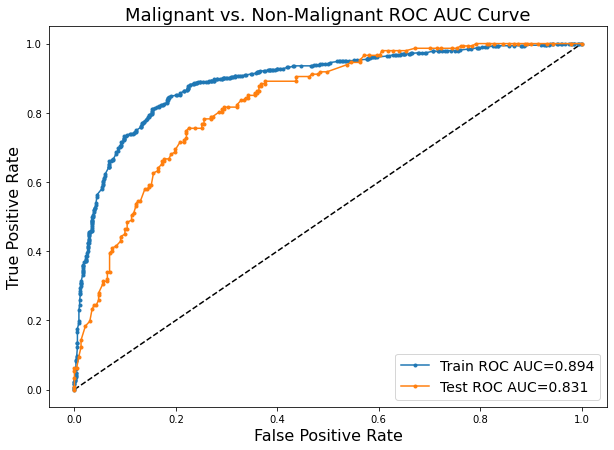

In [110]:
ROC_AUC(result)

### 3.8. (5 points)
Which model works better? Do you think adding 2 additional features help? Why? 

Answer: The updated model with two additional features is not an improvement. It does not have a significant effect on loss after convergence or the AUC for the train or test set. Adding the additional features does not help much if at all. This may be because the first dataset used already has enough features to properly fit the model, so adding more could result in overfitting. A better strategy would be to try to improve the model itself, possibly by adding additional hidden layers with activation functions, pooling, etc.

# Bonus Question: Fairness, Accountability and Transparency in AI (10 points)
------------------------------------------
In this question, we will review the following publication:

Mitchell, M., Wu, S., Zaldivar, A., Barnes, P., Vasserman, L., Hutchinson, B., Spitzer, E., Raji, I.D. and Gebru, T., 2019, January. **Model cards for model reporting**. In Proceedings of the conference on fairness, accountability, and transparency (pp. 220-229). Link: https://arxiv.org/abs/1810.03993

Read this paper. Please share with us in a few bullet points for each:

- What are the reasons authors suggest model cards?
- What are the items that can be included in the model card?
- Your thoughts about how this paper can be relevant to healthcare.

- What are the reasons authors suggest model cards?

-- No standardized procedures for documenting performance characteristics of machine learning and artificial intelligence models

-- ML and AI models often have systematic bias

-- Model cards can report details of datasets used to train and test ML models, and the metrics used to evaluate them

-- The overall purpose of model cards is to be more transparent about the development of ML models, especially for the people that they may affect, and to standardize this reporting. They intend to provide stakeholders with a basis to compare and evaluate not only the effectiveness of models, but also the ethical and fairness implications


- What are the items that can be included in the model card?

-- Explanation of how model was built

-- Assumptions made during development

-- Summary statistics of training and test datasets including demographic breakdown

-- Justification of performance metrics used

-- Intended use

-- Ethical considerations

-- Caveats

- Your thoughts about how this paper can be relevant to healthcare.

This is particularly relevant for healthcare because the implications of ML and AI models used in healthcare are extremely high relative to many other industries. ML models used in healthcare that contain systematic bias could provide disproportionate care or harm to demographic groups that the bias affects. Transparency is essential for ML models in healthcare so that clinicians and patients can be fully informed about the models' advantages and shortcomings before making decisions based on their recommendations. ML models will rarely provide a perfectly fair and unbiased assessment of their target population, but clinicians and patients can benefit greatly from understanding the models' development and methodology.